# SC3000, Z60, Assignment 1
#Group Members: Azfar, 'Irfaan, John
#Contributions: 
###Task 1: Azfar U2122084H
###Task 2: 'Irfaan U2121388D
###Task 3: John U2122963E


## Installing dependencies:

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 54.6 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.3.0
    Uninstalling pygame-2.3.0:
      Successfully uninstalled pygame-2.3.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.0
    Uninstalling setuptools-67.6.0:
      Successfully uninstalled setuptools-67.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [ ]:
!pip install pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing dependencies and define helper functions

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import time # to get the time


def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

#Creating CartPole environment

In [ ]:
env = gym.make("CartPole-v1")

## Task 1: Development of an RL agent using Q-Learning 
## Reference taken from https://medium.com/swlh/using-q-learning-for-openais-cartpole-v1-4a216ef237df

###Initialising variables for QLearning

In [ ]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

epsilon = 1

epsilon_decay_value = 0.99995

q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

#
def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(int))

###Training the agent

###Improvements to the code below:
###A high learning rate can help the agent learn quickly but may cause instability or overfitting, while a low learning rate can help the agent learn more robustly but may require more training time. 
###A common approach is to start with a high learning rate and gradually decrease it over time as the agent becomes more experienced.
###Therefore, we improved the agent by changing the learning rate and discount factor once the episode reached 40000 iterations. Learning rate was decreased from 0.1 to 0.05 and the discount was increased from 0.95 to 0.99.

###Before the change, the average cumulative reward was 323 however now it increased drastically to 485.

In [ ]:
observation = env.reset()
#Training RL Agent (60000 iterations)
for episode in range(EPISODES + 1): 

  #Initial time
  t0 = time.time() 
  (currentState)= env.reset()

  #Convert reseted environment to discrete state
  discrete_state = get_discrete_state(currentState) 
  done = False

  #Initialise episode reward to 0
  episode_reward = 0 
  if episode % 10000 == 0: 
      print("Episode: " + str(episode))

  while not done: 
      if np.random.random() > epsilon:
          #Choosing an action from the q_table
          action = np.argmax(q_table[discrete_state]) 
      else:
          #Random action
          action = np.random.randint(0, env.action_space.n) 
      #Step action to get new states, reward, and the "done" status.
      new_state, reward, done, _= env.step(action) 
      #Updating reward
      episode_reward += reward

      new_discrete_state = get_discrete_state(new_state)


      #Recalibrating q-table
      if episode == 40000:
        LEARNING_RATE = 0.05
        DISCOUNT = 0.99
      if not done: 
          max_future_q = np.max(q_table[new_discrete_state])

          current_q = q_table[discrete_state + (action,)]

          new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

          q_table[discrete_state + (action,)] = new_q

      discrete_state = new_discrete_state
      
  if episode == 0:
    print("Observation:", discrete_state)
    print("Chosen action:", action)
  
  #Modifying epsilon
  if epsilon > 0.05:
      if episode_reward > prior_reward and episode > 10000:
          epsilon = math.pow(epsilon_decay_value, episode - 10000)

  #Final time
  t1 = time.time() 
  #Final time - Initial time
  episode_total = t1 - t0 
  total = total + episode_total
  #Episode total reward
  total_reward += episode_reward
  prior_reward = episode_reward

  #Every 5000 iterations, print the average time and the average reward
  if episode % 5000 == 0: 
      mean = total / 5000
      print("Time Average: " + str(mean))
      total = 0

      mean_reward = total_reward / 5000
      print("Mean Reward: " + str(mean_reward))
      total_reward = 0
env.close()



Episode: 0
Observation: (15, 13, -21, -8)
Chosen action: 1
Time Average: 0.0008467770099639892
Mean Reward: 9.8384
Time Average: 0.0010750360488891602
Mean Reward: 25.0546
Episode: 10000
Time Average: 0.0015209699153900147
Mean Reward: 25.7196
Time Average: 0.0011405569553375244
Mean Reward: 26.961
Episode: 20000
Time Average: 0.0025533771514892577
Mean Reward: 39.0622
Time Average: 0.003012830114364624
Mean Reward: 59.014
Episode: 30000
Time Average: 0.004289655542373657
Mean Reward: 83.386
Time Average: 0.005368421983718872
Mean Reward: 114.1202
Episode: 40000
Time Average: 0.0072372556209564206
Mean Reward: 142.1136
Time Average: 0.01037953724861145
Mean Reward: 222.8038
Episode: 50000
Time Average: 0.01598443970680237
Mean Reward: 326.5928
Time Average: 0.016376485109329222
Mean Reward: 344.0898
Episode: 60000
Time Average: 0.01690556001663208
Mean Reward: 356.0404


## Task 2: Demonstrate the effectiveness of the RL agent

### Testing the effectiveness of the trained RL agent with 100 episodes

In [ ]:
num_episodes = 100
max_time_steps = 500

mylist = []
total = 0
#Test the agent using the Q-table
for i in range(num_episodes):
    state = env.reset()
    discrete_state = get_discrete_state(state) 
    total_reward = 0
    for t in range(max_time_steps):
        #Choose the action with the highest Q-value for the current state
        action = np.argmax(q_table[discrete_state])
        #Take the action and observe the resulting next state and reward
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        #Update the current state to be the next state
        state = next_state
        discrete_state = get_discrete_state(state)
        if done:
            break
    print('Episode {}: Total Reward = {}'.format(i+1, total_reward))
    mylist.append(total_reward)

# Close the environment
env.close()

Episode 1: Total Reward = 500.0
Episode 2: Total Reward = 500.0
Episode 3: Total Reward = 500.0
Episode 4: Total Reward = 500.0
Episode 5: Total Reward = 500.0
Episode 6: Total Reward = 492.0
Episode 7: Total Reward = 500.0
Episode 8: Total Reward = 454.0
Episode 9: Total Reward = 500.0
Episode 10: Total Reward = 500.0
Episode 11: Total Reward = 500.0
Episode 12: Total Reward = 500.0
Episode 13: Total Reward = 500.0
Episode 14: Total Reward = 500.0
Episode 15: Total Reward = 500.0
Episode 16: Total Reward = 500.0
Episode 17: Total Reward = 500.0
Episode 18: Total Reward = 500.0
Episode 19: Total Reward = 500.0
Episode 20: Total Reward = 500.0
Episode 21: Total Reward = 468.0
Episode 22: Total Reward = 500.0
Episode 23: Total Reward = 500.0
Episode 24: Total Reward = 500.0
Episode 25: Total Reward = 500.0
Episode 26: Total Reward = 500.0
Episode 27: Total Reward = 500.0
Episode 28: Total Reward = 500.0
Episode 29: Total Reward = 488.0
Episode 30: Total Reward = 500.0
Episode 31: Total R

###Plotting cumulative rewards against 100 episodes

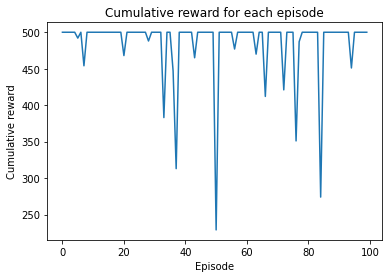

In [ ]:
final_arr = np.array(mylist)
plt.plot(final_arr)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('Episode')
plt.show()

Print the average reward over the 100 episodes.

In [ ]:
total = 0
for i in mylist:
  total += i
average = total/100
print("Average cumulative reward:", average)
print("Is my agent good enough?", average > 195)

Average cumulative reward: 485.82
Is my agent good enough? True


## Task 3: Render one episode played by the agent

###Rendered results from RL agent

In [ ]:
env = RecordVideo(gym.make("CartPole-v1"), "./video1")
state = env.reset()
discrete_state = get_discrete_state(state) 
total_reward = 0
for t in range(max_time_steps):
    #Choose the action with the highest Q-value for the current state
    action = np.argmax(q_table[discrete_state])
    #Take the action and observe the resulting next state and reward
    next_state, reward, done, info = env.step(action)
    total_reward += reward
    #Update the current state to be the next state
    state = next_state
    discrete_state = get_discrete_state(state)
    if done:
        break

In [ ]:
import glob
files = glob.glob(f'{env.video_folder}/{env.name_prefix}*.mp4')

###RL Agent Video

In [ ]:
from IPython.display import Video

Video(files[0], embed=True)